In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
# from osgeo import gdal
import geopandas as gpd
import rioxarray as rxr
import rasterio
from rasterio.plot import show, adjust_band
# import earthpy as et
# import earthpy.spatial as es
# import earthpy.plot as ep
from matplotlib import cm
import matplotlib

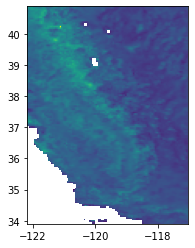

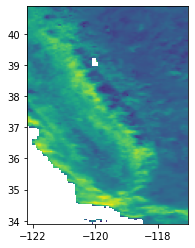

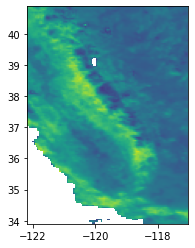

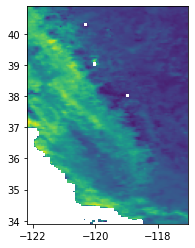

In [3]:
filepath = '\\users\\marianne\\documents\\data\\pe_snow_fires_data\\ndvi_monthly\\'
years = range(2000,2001)
for yr in years:
    wy_dates = [str(yr)+'-10', str(yr)+'-11',str(yr)+'-12',str(yr+1)+'-01',str(yr+1)+'-02',str(yr+1)+'-03',str(yr+1)+'-04',str(yr+1)+'-05',str(yr+1)+'-06',str(yr+1)+'-07',str(yr+1)+'-08',str(yr+1)+'-09']
    for wyd in wy_dates[0:4]:
        filename = filepath + wyd + '.tif'
        data = rasterio.open(filename)
        show(data)



In [14]:
for wyd in wy_dates[0:4]:
    print(wyd)

2000-10
2000-11
2000-12
2001-01


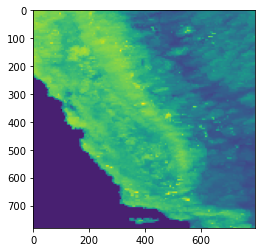

<AxesSubplot:>

In [4]:
yr = 2000
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
show(dataset)

In [6]:
pe_data_dir = '/users/marianne/documents/pe_snow_fires/data/'
sn_watersheds= gpd.read_file(pe_data_dir + 'sn_watersheds.shp')
data_dir = '/users/marianne/documents/data/'
mtbs= gpd.read_file(data_dir + 'mtbs_perimeter_data/mtbs_perims_DD.shp')

In [33]:

import pyproj
pyproj.datadir.get_data_dir()

'C:\\Users\\Marianne\\anaconda3\\envs\\swe\\lib\\site-packages\\pyproj\\proj_dir\\share\\proj'

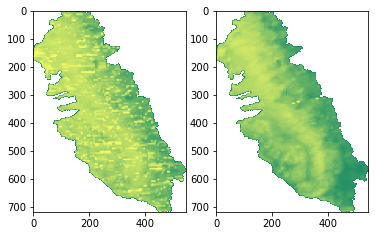

In [13]:

summer = cm.get_cmap('summer', 256)
newcolors = summer(np.linspace(0, 1, 256))
white = np.array([1,1,1,0])
newcolors[:10, :] = white
newcmp = matplotlib.colors.ListedColormap(newcolors)

sn_geom = sn_watersheds.to_crs(dataset.rio.crs)
f,ax=plt.subplots(1,2)
yr = 2004
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)
ax[0].imshow(avhrr_clip[0,:,:],
            # ax=ax[0],
            # title = 'max NDVI ' + str(yr),
            cmap = newcmp)
yr=2013
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)

ax[1].imshow(avhrr_clip[0,:,:],
            # ax=ax[1],
            # title = 'max NDVI ' + str(yr),
            cmap = newcmp)

In [14]:
max_ndvi=[]
for yr in range(1980,2016):
    dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
    avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)
    max_ndvi.append(np.nanmean(avhrr_clip.values))
    # print(np.nanmean(avhrr_clip.values))